In [1]:
#Setups and data cleaning. 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st 
from scipy.stats import pearsonr, linregress

food_inflation_data_path = "inflation.csv"
food_ava_data_path = "ava.csv"

food_ava_data = pd.read_csv(food_ava_data_path)
food_inflation_data = pd.read_csv(food_inflation_data_path)


In [2]:
#filter data
to_remove = ["..", "F", "x"]
to_remove = ["Kilograms per person, per year", "Litres per person, per year"]

filtered_food_ava_data = food_ava_data[~food_ava_data.apply(lambda row: any(val in str(row.values) for val in to_remove), axis=1)].reset_index(drop=True)

filtered_food_ava_data.to_csv(food_ava_data_path, index=False)

In [3]:
#Inflation Table Sample 
food_inflation_data.head()

,Commodity,2018,2019,2020,2021,2022
0,Food purchased from stores,142.3,147.6,151.1,154.4,169.5
1,Meat,157.8,163.8,171.2,178.6,193.0
2,Fresh or frozen meat (excluding poultry),167.0,171.7,181.3,187.1,200.7
3,Fresh or frozen poultry,154.8,160.0,164.0,174.6,186.8
4,Processed meat,147.1,154.6,162.4,168.8,185.0


In [4]:
# Calculate the inflation change from 2018 to 2022
food_inflation_data["Change 2018-2022"] = ((food_inflation_data["2022"] - food_inflation_data["2018"]) / food_inflation_data["2018"]) * 100

# Find the row with the greatest inflation change
max_inflation_row = food_inflation_data.loc[food_inflation_data["Change 2018-2022"].idxmax()]
min_inflation_row = food_inflation_data.loc[food_inflation_data["Change 2018-2022"].idxmin()]

# Retrieve the product and the corresponding inflation change
greatest_product = max_inflation_row["Commodity"]
greatest_inflation = max_inflation_row["Change 2018-2022"]

least_product = min_inflation_row["Commodity"]
least_inflation = min_inflation_row["Change 2018-2022"]

# Print the results
print("Greatest Inflation Increase:")
print("Product:", greatest_product)
print("Greatest Inflation Change:", greatest_inflation)

print("\nLeast Inflation Increase:")
print("Product:", least_product)
print("Inflation Change:", least_inflation)


Greatest Inflation Increase:
Product: Processed meat
Greatest Inflation Change: 25.764785859959215

Least Inflation Increase:
Product: Fish, seafood and other marine products
Inflation Change: 14.930808448652586


In [5]:
# Calculate the inflation change from 2018 to 2022
food_inflation_data["Change 2018-2022"] = ((food_inflation_data["2022"] - food_inflation_data["2018"]) / food_inflation_data["2018"]) * 100

# Filter for meat-related data
meat_data = food_inflation_data[food_inflation_data["Commodity"].str.contains("meat|poultry", case=False)]

# Calculate the average inflation change for each meat-related commodity
meat_average_changes = meat_data.groupby("Commodity")["Change 2018-2022"].mean()

# Print the individual meat average inflation changes
for meat_type, average_change in meat_average_changes.items():
    print(f"{meat_type}: {average_change}%")

Fresh or frozen meat (excluding poultry): 20.179640718562865%
Fresh or frozen poultry: 20.671834625322997%
Meat: 22.306717363751574%
Processed meat: 25.764785859959215%


In [6]:
# Calculate the inflation change for each year
for i in range(2019, 2023):
    col_name = str(i)
    prev_col_name = str(i-1)
    period = f"{prev_col_name}-{col_name}"
    food_inflation_data[period] = ((food_inflation_data[col_name] - food_inflation_data[prev_col_name]) / food_inflation_data[prev_col_name]) * 100

# Filter for meat-related data
meat_data = food_inflation_data[food_inflation_data["Commodity"].str.contains("meat|poultry", case=False)]

# Calculate the average inflation change for each meat-related commodity in each year
years = range(2019, 2023)

for year in years:
    print(f"\nAverage Inflation Change {year}:")
    for meat_type, row in meat_data.iterrows():
        current_price = row[str(year)]
        prev_price = row[str(year - 1)]
        percent_change = ((current_price - prev_price) / prev_price) * 100
        commodity_name = row["Commodity"]
        print(f"{commodity_name}: {percent_change:.2f}%")




Average Inflation Change 2019:
Meat: 3.80%
Fresh or frozen meat (excluding poultry): 2.81%
Fresh or frozen poultry: 3.36%
Processed meat: 5.10%

Average Inflation Change 2020:
Meat: 4.52%
Fresh or frozen meat (excluding poultry): 5.59%
Fresh or frozen poultry: 2.50%
Processed meat: 5.05%

Average Inflation Change 2021:
Meat: 4.32%
Fresh or frozen meat (excluding poultry): 3.20%
Fresh or frozen poultry: 6.46%
Processed meat: 3.94%

Average Inflation Change 2022:
Meat: 8.06%
Fresh or frozen meat (excluding poultry): 7.27%
Fresh or frozen poultry: 6.99%
Processed meat: 9.60%


In [7]:
#Food Available Table Sample 
food_ava_data.head()

,Commodity,2018,2019,2020,2021,2022
0,Wheat flour,58.07,60.15,59.90,58.07,59.21
1,Rye flour,0.17,0.21,0.17,0.16,0.15
2,Oatmeal and rolled oats,4.09,4.74,1.78,0.76,1.60
3,Pot and pearl barley,0.51,0.47,0.49,0.25,0.19
4,Corn flour and meal,0.70,0.55,0.99,1.36,1.32


In [8]:
meat_commodities = ["Chicken", "Pork", "Hen", "Offal", "Beef", "Turkey", "Mutton", "Veal"]
meat_availability = food_ava_data[food_ava_data["Commodity"].str.contains('|'.join(meat_commodities), case=False)]

meat_availability.head()


,Commodity,2018,2019,2020,2021,2022
77,"Chicken, boneless weight",20.88,21.10,20.65,20.73,21.30
78,"Chicken, eviscerated weight",34.69,35.05,34.30,34.43,35.38
79,"Stewing hen, boneless weight",1.70,1.75,1.63,1.50,1.53
80,"Stewing hen, eviscerated weight",2.82,2.90,2.71,2.49,2.54
81,"Chicken and stewing hen total, boneless weight",22.58,22.85,22.28,22.22,22.83


In [9]:
#Find the Averages of Averages for Meat, see how meat overall has changed. (in Weight)
average_changes_meat = []

for commodity in meat_commodities:
   
    commodity_data = meat_availability[meat_availability["Commodity"].str.contains(commodity, case=False)]
    
    average_change = commodity_data.iloc[:, 1:].diff(axis=1).mean().mean()
    
    average_changes_meat.append(average_change)

average_of_average_changes = sum(average_changes_meat) / len(average_changes_meat)

print("Average Change of Individual Meat Values:")
for i, commodity in enumerate(meat_commodities):
    print(f"{commodity}: {average_changes_meat[i]}")


print("\nAverage Change of the Previous Values:")
print(average_of_average_changes)

Average Change of Individual Meat Values:
Chicken: 0.11125000000000052
Pork: -0.30583333333333323
Hen: 0.013750000000000123
Offal: -0.07999999999999999
Beef: -0.13916666666666688
Turkey: -0.20874999999999994
Mutton: 0.004166666666666673
Veal: -0.07375000000000015

Average Change of the Previous Values:
-0.08479166666666663


In [10]:
# Initialize a list to store the changes in weight for each commodity
changes_2018_2019 = []
changes_2019_2020 = []
changes_2020_2021 = []
changes_2021_2022 = []

for commodity in meat_commodities:
    # Filter the data for the specific commodity
    commodity_data = meat_availability[meat_availability['Commodity'].str.contains(commodity, case=False)]
    
    # Extract the weight values for the desired years
    weight_2018 = commodity_data['2018'].values[0]
    weight_2019 = commodity_data['2019'].values[0]
    weight_2020 = commodity_data['2020'].values[0]
    weight_2021 = commodity_data['2021'].values[0]
    weight_2022 = commodity_data['2022'].values[0]
    
    # Calculate the changes in weight
    change_2018_2019 = weight_2019 - weight_2018
    change_2019_2020 = weight_2020 - weight_2019
    change_2020_2021 = weight_2021 - weight_2020
    change_2021_2022 = weight_2022 - weight_2021
    
    # Append the changes to the respective lists
    changes_2018_2019.append(change_2018_2019)
    changes_2019_2020.append(change_2019_2020)
    changes_2020_2021.append(change_2020_2021)
    changes_2021_2022.append(change_2021_2022)

# Print the changes in weight for each commodity
print("Change in Weight from 2018 to 2019:")
for i, commodity in enumerate(meat_commodities):
    print(f"{commodity}: {changes_2018_2019[i]}")

print("\nChange in Weight from 2019 to 2020:")
for i, commodity in enumerate(meat_commodities):
    print(f"{commodity}: {changes_2019_2020[i]}")

print("\nChange in Weight from 2020 to 2021:")
for i, commodity in enumerate(meat_commodities):
    print(f"{commodity}: {changes_2020_2021[i]}")

print("\nChange in Weight from 2021 to 2022:")
for i, commodity in enumerate(meat_commodities):
    print(f"{commodity}: {changes_2021_2022[i]}")



Change in Weight from 2018 to 2019:
Chicken: 0.22000000000000242
Pork: 0.41999999999999815
Hen: 0.050000000000000044
Offal: 0.030000000000000027
Beef: 0.019999999999999574
Turkey: -0.29000000000000004
Mutton: -0.10000000000000009
Veal: -0.030000000000000027

Change in Weight from 2019 to 2020:
Chicken: -0.45000000000000284
Pork: -3.3099999999999987
Hen: -0.1200000000000001
Offal: -0.17999999999999994
Beef: 0.5199999999999996
Turkey: -0.11999999999999966
Mutton: 0.020000000000000018
Veal: 0.039999999999999925

Change in Weight from 2020 to 2021:
Chicken: 0.08000000000000185
Pork: 0.15000000000000213
Hen: -0.1299999999999999
Offal: -0.09999999999999998
Beef: -1.8699999999999974
Turkey: -0.10000000000000009
Mutton: -0.020000000000000018
Veal: -0.029999999999999916

Change in Weight from 2021 to 2022:
Chicken: 0.5700000000000003
Pork: 1.25
Hen: 0.030000000000000027
Offal: -0.07000000000000006
Beef: 0.7399999999999984
Turkey: -0.22999999999999998
Mutton: 0.1200000000000001
Veal: -0.01000000

In [11]:
percentage_changes_meat = []

for commodity in meat_commodities:
    commodity_data = meat_availability[meat_availability["Commodity"].str.contains(commodity, case=False)]
    values = commodity_data.iloc[:, 1:].values  # Get all the values for the commodity
    initial_value = values[0][0]  # Get the initial value from the first year
    
    percentage_changes = [(value - initial_value) / initial_value * 100 for value in values[0]]
    percentage_changes_meat.append(percentage_changes)

print("Percentage Change of Individual Meat Values:")
for i, commodity in enumerate(meat_commodities):
    print(f"{commodity}: {percentage_changes_meat[i]}")


Percentage Change of Individual Meat Values:
Chicken: [0.0, 1.0536398467433066, -1.1015325670498104, -0.7183908045976943, 2.0114942528735713]
Pork: [0.0, 1.9390581717451438, -13.34256694367498, -12.650046168051702, -6.879039704524462]
Hen: [0.0, 2.941176470588238, -4.117647058823533, -11.764705882352938, -9.999999999999996]
Offal: [0.0, 2.6086956521739157, -13.04347826086956, -21.7391304347826, -27.82608695652174]
Beef: [0.0, 0.07864726700746982, 2.1234762092017267, -5.230043255996848, -2.3200943767204083]
Turkey: [0.0, -8.579881656804735, -12.13017751479289, -15.088757396449697, -21.89349112426035]
Mutton: [0.0, -9.345794392523372, -7.476635514018698, -9.345794392523372, 1.8691588785046744]
Veal: [0.0, -3.2258064516129057, 1.0752688172042901, -2.1505376344086042, -3.2258064516129057]


In [12]:
# Create a dictionary to store the combined percentage changes
combined_percentage_changes = {
    "Poultry": {},
    "Meat": {},
    "Meats (excluding poultry)": {}
}

# Calculate the combined percentage changes for Poultry
combined_percentage_changes["Poultry"]["2018-2019"] = percentage_changes_meat[0][0] + percentage_changes_meat[2][0]
combined_percentage_changes["Poultry"]["2019-2020"] = percentage_changes_meat[0][1] + percentage_changes_meat[2][1]
combined_percentage_changes["Poultry"]["2020-2021"] = percentage_changes_meat[0][2] + percentage_changes_meat[2][2]
combined_percentage_changes["Poultry"]["2021-2022"] = percentage_changes_meat[0][3] + percentage_changes_meat[2][3]

# Calculate the combined percentage changes for Meat
combined_percentage_changes["Meat"]["2018-2019"] = sum([percentage_changes_meat[i][0] for i in range(len(percentage_changes_meat))])
combined_percentage_changes["Meat"]["2019-2020"] = sum([percentage_changes_meat[i][1] for i in range(len(percentage_changes_meat))])
combined_percentage_changes["Meat"]["2020-2021"] = sum([percentage_changes_meat[i][2] for i in range(len(percentage_changes_meat))])
combined_percentage_changes["Meat"]["2021-2022"] = sum([percentage_changes_meat[i][3] for i in range(len(percentage_changes_meat))])

# Calculate the combined percentage changes for Meats (excluding poultry)
meats_excluding_poultry = [commodity for commodity in meat_commodities if commodity not in ["Chicken", "Hen"]]
combined_percentage_changes["Meats (excluding poultry)"]["2018-2019"] = sum([percentage_changes_meat[i][0] for i, commodity in enumerate(meat_commodities) if commodity in meats_excluding_poultry])
combined_percentage_changes["Meats (excluding poultry)"]["2019-2020"] = sum([percentage_changes_meat[i][1] for i, commodity in enumerate(meat_commodities) if commodity in meats_excluding_poultry])
combined_percentage_changes["Meats (excluding poultry)"]["2020-2021"] = sum([percentage_changes_meat[i][2] for i, commodity in enumerate(meat_commodities) if commodity in meats_excluding_poultry])
combined_percentage_changes["Meats (excluding poultry)"]["2021-2022"] = sum([percentage_changes_meat[i][3] for i, commodity in enumerate(meat_commodities) if commodity in meats_excluding_poultry])

# Convert the dictionary to a DataFrame
combined_percentage_changes_df = pd.DataFrame(combined_percentage_changes)

# Display the combined percentage changes
print(combined_percentage_changes_df)


             Poultry       Meat  Meats (excluding poultry)
2018-2019   0.000000   0.000000                   0.000000
2019-2020   3.994816 -12.530265                 -16.525081
2020-2021  -5.219180 -48.013293                 -42.794113
2021-2022 -12.483097 -78.687406                 -66.204309


In [13]:
# Create a dictionary to store the combined weights
combined_weights_dict = {
    "Poultry": {},
    "Meat": {},
    "Meats (excluding poultry)": {}
}

# Calculate the combined weights for Poultry
combined_weights_dict["Poultry"]["2018-2019"] = 0.22 + 0.05
combined_weights_dict["Poultry"]["2019-2020"] = -0.45 - 0.12
combined_weights_dict["Poultry"]["2020-2021"] = 0.08 - 0.13
combined_weights_dict["Poultry"]["2021-2022"] = 0.57 + 0.03

# Calculate the combined weights for Meat
combined_weights_dict["Meat"]["2018-2019"] = (0.22 + 0.42 + 0.05 + 0.03 + 0.02 - 0.29 - 0.1 - 0.03)
combined_weights_dict["Meat"]["2019-2020"] = (-0.45 - 3.31 - 0.12 - 0.18 + 0.52 - 0.29 + 0.02 + 0.04)
combined_weights_dict["Meat"]["2020-2021"] = (0.08 + 0.15 - 0.13 - 0.1 - 1.87 - 0.1 - 0.02 - 0.03)
combined_weights_dict["Meat"]["2021-2022"] = (0.57 + 1.25 + 0.03 - 0.07 + 0.74 - 0.23 + 0.12 - 0.01)

# Calculate the combined weights for Meats (excluding poultry)
combined_weights_dict["Meats (excluding poultry)"]["2018-2019"] = (0.42 + 0.03 + 0.02 - 0.29 - 0.03)
combined_weights_dict["Meats (excluding poultry)"]["2019-2020"] = (-3.31 - 0.18 + 0.52 - 0.12 + 0.02 + 0.04)
combined_weights_dict["Meats (excluding poultry)"]["2020-2021"] = (0.15 - 0.1 - 1.87 - 0.1 - 0.02 - 0.03)
combined_weights_dict["Meats (excluding poultry)"]["2021-2022"] = (1.25 + 0.03 - 0.07 + 0.74 - 0.23 + 0.12 - 0.01)

# Convert the dictionary to a DataFrame
combined_weights_df = pd.DataFrame(combined_weights_dict)

# Display the combined weights dataset
print(combined_weights_df)

           Poultry  Meat  Meats (excluding poultry)
2018-2019     0.27  0.32                       0.15
2019-2020    -0.57 -3.77                      -3.03
2020-2021    -0.05 -2.02                      -1.97
2021-2022     0.60  2.40                       1.83


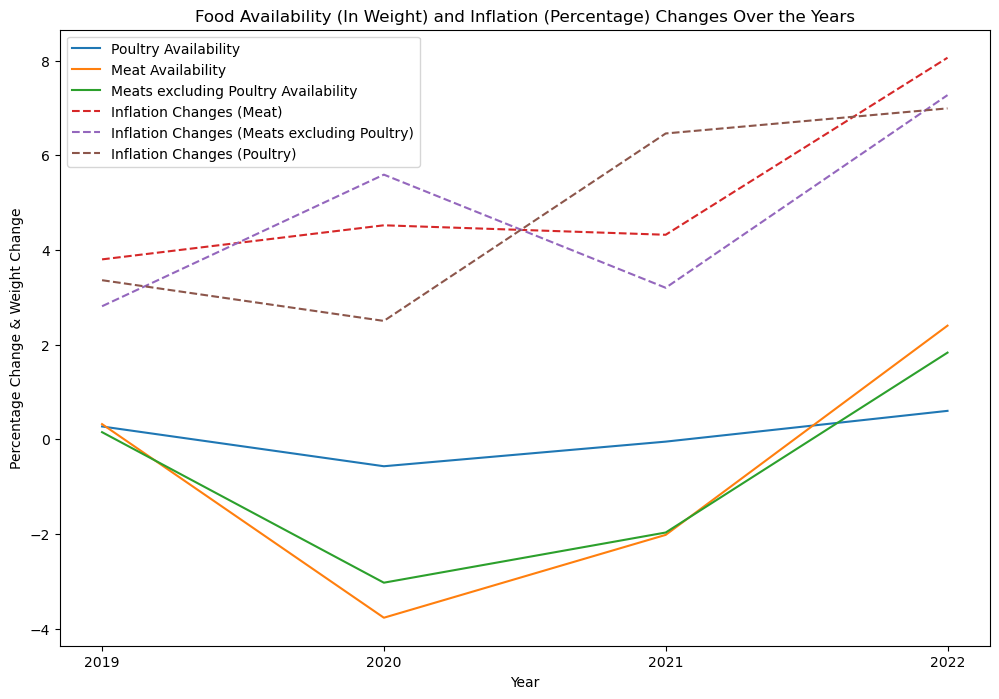

In [14]:
years = ["2019", "2020", "2021", "2022"]
poultry_changes = [0.27, -0.57 , -0.05, 0.60]
meat_changes = [0.32, -3.77, -2.02, 2.40]
meats_excluding_poultry_changes = [0.15, -3.03, -1.97, 1.83]
inflation_changes_meat = [3.80, 4.52, 4.32, 8.06]
inflation_changes_meats_excluding_poultry = [2.81, 5.59, 3.20, 7.27]
inflation_changes_poultry = [3.36, 2.50, 6.46, 6.99]


plt.figure(figsize=(12, 8))

plt.plot(years, poultry_changes, label="Poultry Availability")
plt.plot(years, meat_changes, label="Meat Availability")
plt.plot(years, meats_excluding_poultry_changes, label="Meats excluding Poultry Availability")

plt.plot(years, inflation_changes_meat, linestyle="--", label="Inflation Changes (Meat)")
plt.plot(years, inflation_changes_meats_excluding_poultry, linestyle="--", label="Inflation Changes (Meats excluding Poultry)")
plt.plot(years, inflation_changes_poultry, linestyle="--", label="Inflation Changes (Poultry)")

plt.xlabel("Year")
plt.ylabel("Percentage Change & Weight Change")
plt.title("Food Availability (In Weight) and Inflation (Percentage) Changes Over the Years")

plt.legend(loc="upper left")

plt.savefig("Food Availability and Inflation Changes Over the Years.png")

plt.show()

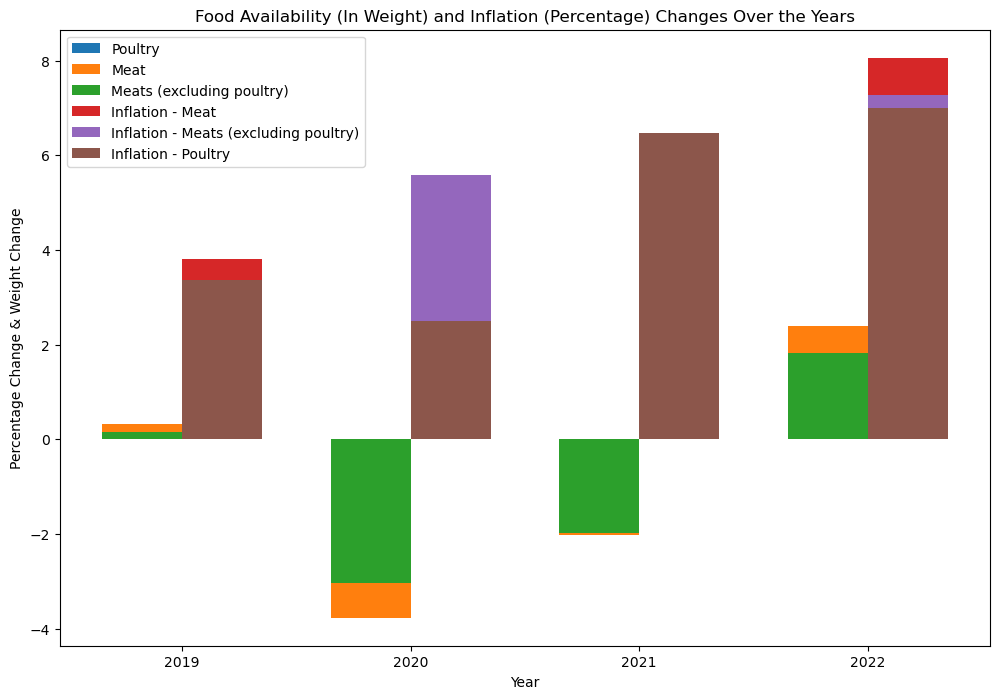

In [15]:
years = ["2019", "2020", "2021", "2022"]
poultry_changes = [0.27, -0.57 , -0.05, 0.60]
meat_changes = [0.32, -3.77, -2.02, 2.40]
meats_excluding_poultry_changes = [0.15, -3.03, -1.97, 1.83]
inflation_changes_meat = [3.80, 4.52, 4.32, 8.06]
inflation_changes_meats_excluding_poultry = [2.81, 5.59, 3.20, 7.27]
inflation_changes_poultry = [3.36, 2.50, 6.46, 6.99]

plt.figure(figsize=(12, 8)) 

bar_width = 0.35

bar_positions = np.arange(len(years))

plt.bar(bar_positions - bar_width/2, poultry_changes, width=bar_width, label='Poultry')
plt.bar(bar_positions - bar_width/2, meat_changes, width=bar_width, label='Meat')
plt.bar(bar_positions - bar_width/2, meats_excluding_poultry_changes, width=bar_width, label='Meats (excluding poultry)')

plt.bar(bar_positions + bar_width/2, inflation_changes_meat, width=bar_width, label='Inflation - Meat')
plt.bar(bar_positions + bar_width/2, inflation_changes_meats_excluding_poultry, width=bar_width, label='Inflation - Meats (excluding poultry)')
plt.bar(bar_positions + bar_width/2, inflation_changes_poultry, width=bar_width, label='Inflation - Poultry')

plt.xlabel("Year")
plt.ylabel("Percentage Change & Weight Change")
plt.title("Food Availability (In Weight) and Inflation (Percentage) Changes Over the Years")

plt.xticks(bar_positions, years)

plt.legend()

plt.savefig("Changes in Weight vs Inflation Change per year.png")

plt.show()

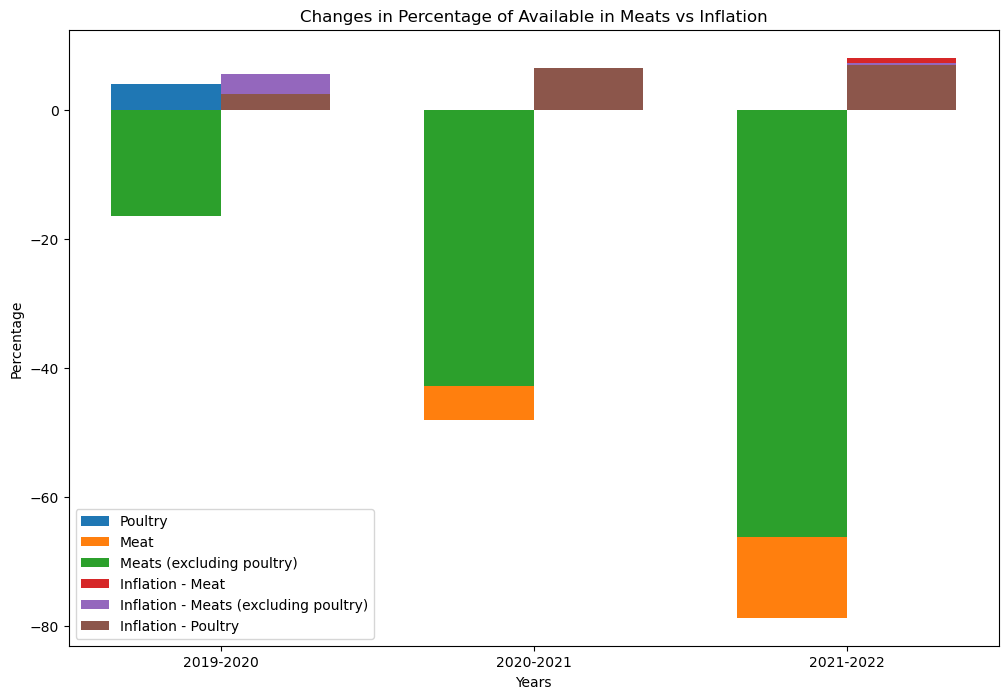

In [16]:
# Define the data
years = ["2019-2020", "2020-2021", "2021-2022"]
poultry_changes = [3.994816, -5.219180, -12.483097]
meat_changes = [-12.530265, -48.013293, -78.687406]
meats_excluding_poultry_changes = [-16.525081, -42.794113, -66.204309]

inflation_changes_meat = [4.52, 4.32, 8.06]
inflation_changes_meats_excluding_poultry = [5.59, 3.20, 7.27]
inflation_changes_poultry = [2.50, 6.46, 6.99]

plt.figure(figsize=(12, 8))

bar_width = 0.35

bar_positions = np.arange(len(years))

plt.bar(bar_positions - bar_width/2, poultry_changes, width=bar_width, label='Poultry')
plt.bar(bar_positions - bar_width/2, meat_changes, width=bar_width, label='Meat')
plt.bar(bar_positions - bar_width/2, meats_excluding_poultry_changes, width=bar_width, label='Meats (excluding poultry)')

plt.bar(bar_positions + bar_width/2, inflation_changes_meat, width=bar_width, label='Inflation - Meat')
plt.bar(bar_positions + bar_width/2, inflation_changes_meats_excluding_poultry, width=bar_width, label='Inflation - Meats (excluding poultry)')
plt.bar(bar_positions + bar_width/2, inflation_changes_poultry, width=bar_width, label='Inflation - Poultry')

plt.title("Changes in Percentage of Available in Meats vs Inflation")
plt.xlabel("Years")
plt.ylabel("Percentage")

plt.xticks(bar_positions, years)

plt.legend()

plt.savefig("Changes in Available Meats vs Inflation Change per year.png")

plt.show()

In [17]:
meat_changes = [0.02625, -0.3575, 0.14625]
inflation_changes_meat = [3.80, 4.52, 4.32]

correlation, p_value = st.pearsonr(meat_changes, inflation_changes_meat)

print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")

Correlation: -0.5362347039402047
P-value: 0.6396923911512657


In [18]:
poultry_changes = [0.135, -0.285, 0.275]
inflation_changes_poultry = [3.36, 2.50, 6.46]

correlation, p_value = st.pearsonr(poultry_changes, inflation_changes_poultry)

print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")

Correlation: 0.8271961388150534
P-value: 0.37986909094454846


In [19]:
meats_excluding_poultry_changes = [-0.09, -0.5816666666666667, -0.11833333333333333]
inflation_changes_meats_excluding = [2.81, 5.59, 3.20]

correlation, p_value = st.pearsonr(meats_excluding_poultry_changes, inflation_changes_meats_excluding)

print(f"Correlation: {correlation}")
print(f"P-value: {p_value}")

Correlation: -0.996914212439688
P-value: 0.05002531988340623


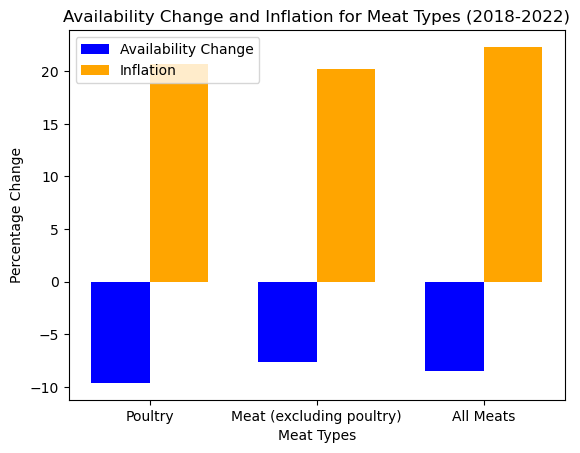

In [20]:
meat_types = ["Poultry", "Meat (excluding poultry)", "All Meats"  ]
availability_change = [-9.63, -7.68, -8.53 ]
inflation = [20.67183, 20.17964, 22.30672]

# Set the bar width
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(meat_types))
r2 = [x + bar_width for x in r1]

# Create the grouped bar chart
plt.bar(r1, availability_change, color='blue', width=bar_width, label='Availability Change')
plt.bar(r2, inflation, color='orange', width=bar_width, label='Inflation')

# Add labels and title
plt.xlabel("Meat Types")
plt.ylabel("Percentage Change")
plt.title("Availability Change and Inflation for Meat Types (2018-2022)")

# Set x-axis tick labels
plt.xticks([r + bar_width/2 for r in range(len(meat_types))], meat_types)

# Add a legend
plt.legend()

# Display the chart
plt.show()

In [21]:
availability_change = np.array([-9.63, -7.68, -8.53])
inflation = np.array([20.67183, 20.17964, 22.30672])

correlation_coefficient = np.corrcoef(availability_change, inflation)[0, 1]

print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: -0.14841103257079208


In [22]:
# Will add some additional information... and might clean up some stuff. 